In [1]:
import os
from pydub import AudioSegment

In [2]:
#edit from ale's code

def partition_dataset(datapath, out, ms, hop = None):
    
    if hop is None:
        hop = ms
    cats = os.listdir(datapath)
    for cat in cats:
        dirpath = os.path.join(datapath, str(cat))
        for track in os.listdir(dirpath):
            trackpath = os.path.join(dirpath, str(track))
            audio = AudioSegment.from_file(trackpath)
            
            size = len(audio) #boh
            segments = []
            i = 0
            while(i+ms < size):
                next_segment = audio[i:i+ms]
                segments.append(next_segment)
                i = i+hop
            
            outpath = os.path.join(out, str(cat), str(track.split(".")[0]))
            
            if not os.path.isdir(outpath):
                os.makedirs(outpath)
                
            form = track.split(".")[-1]
                    
            for idx, segment in enumerate(segments):
                segment.export(os.path.join(outpath, str(str(idx) + "." + form)), format=form)


In [3]:
partition_dataset('../dataset/UtahAudioData','../dataset/segments',10000, 5000)

Now we read the dataset for tensorflow

In [5]:
import glob
from Spectrum import Spectrum 

spectres = []
labels = []

#177
records = glob.glob('../dataset/segments/concrete_mixer/ConcreteMixer_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(0.0)

#69
records = glob.glob('../dataset/segments/dozer_JD700J/JD700J_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(1.0)

#111
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onboard/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)
#44
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)

#112
records = glob.glob('../dataset/segments/excavator_JD50G/JD50G_onsit_0/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(2.0)

#237
records = glob.glob('../dataset/segments/grader_JD670G/JD670G_onboard/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(3.0)
#238
records = glob.glob('../dataset/segments/grader_JD670G/JD670G_onsite/*.wav')
for record in records:
    data = Spectrum.compute_specgram_and_delta(record)
    spectres.append(data)
    labels.append(3.0)

In [20]:
print(len(spectres))
print(spectres[0].shape)
print(len(labels))


995
(128, 44, 2)
995


AttributeError: 'float' object has no attribute 'shape'

In [24]:
import pickle
dataset = (spectres, labels)
'''
with open('dataset','wb') as out:
    pickle.dump(dataset, out)
'''

In [32]:
import pickle
with open('dataset','rb') as inp:
    dataset = pickle.load(inp)

In [44]:
import random
X, Y = dataset
new_dataset = [x for x in zip(X,Y)]
random.shuffle(new_dataset)
print(new_dataset[0])
X = []
Y = []
for x, y in new_dataset:
    X.append(x)
    Y.append(y)

(array([[[-3.57568262e+01,  5.83802958e-01],
        [-3.91446069e+01,  5.83802958e-01],
        [-3.00469970e+01,  5.83802958e-01],
        ...,
        [-2.39652019e+01, -2.47854020e-01],
        [-1.78122002e+01, -2.47854020e-01],
        [-2.46438175e+01, -2.47854020e-01]],

       [[-3.15093145e+01,  4.13028400e-01],
        [-4.05511051e+01,  4.13028400e-01],
        [-3.04499306e+01,  4.13028400e-01],
        ...,
        [-2.27153192e+01, -5.51322180e-01],
        [-1.72067430e+01, -5.51322180e-01],
        [-2.20723518e+01, -5.51322180e-01]],

       [[-3.38103562e+01,  1.94627990e-01],
        [-3.38443457e+01,  1.94627990e-01],
        [-2.82782777e+01,  1.94627990e-01],
        ...,
        [-2.36914737e+01, -1.09089279e+00],
        [-1.98452068e+01, -1.09089279e+00],
        [-2.63971639e+01, -1.09089279e+00]],

       ...,

       [[-5.87395780e+01, -1.41736147e+00],
        [-8.00000000e+01, -1.41736147e+00],
        [-8.00000000e+01, -1.41736147e+00],
        ...,
    

In [45]:
print(X[0])
print(Y[0])

[[[-3.57568262e+01  5.83802958e-01]
  [-3.91446069e+01  5.83802958e-01]
  [-3.00469970e+01  5.83802958e-01]
  ...
  [-2.39652019e+01 -2.47854020e-01]
  [-1.78122002e+01 -2.47854020e-01]
  [-2.46438175e+01 -2.47854020e-01]]

 [[-3.15093145e+01  4.13028400e-01]
  [-4.05511051e+01  4.13028400e-01]
  [-3.04499306e+01  4.13028400e-01]
  ...
  [-2.27153192e+01 -5.51322180e-01]
  [-1.72067430e+01 -5.51322180e-01]
  [-2.20723518e+01 -5.51322180e-01]]

 [[-3.38103562e+01  1.94627990e-01]
  [-3.38443457e+01  1.94627990e-01]
  [-2.82782777e+01  1.94627990e-01]
  ...
  [-2.36914737e+01 -1.09089279e+00]
  [-1.98452068e+01 -1.09089279e+00]
  [-2.63971639e+01 -1.09089279e+00]]

 ...

 [[-5.87395780e+01 -1.41736147e+00]
  [-8.00000000e+01 -1.41736147e+00]
  [-8.00000000e+01 -1.41736147e+00]
  ...
  [-8.00000000e+01 -1.49006151e-15]
  [-8.00000000e+01 -1.49006151e-15]
  [-8.00000000e+01 -1.49006151e-15]]

 [[-5.88000757e+01 -1.41332829e+00]
  [-8.00000000e+01 -1.41332829e+00]
  [-8.00000000e+01 -1.4133

In [46]:
import numpy as np
X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.int32)
data_size = len(X)
split_size = int(0.7*data_size)
xtrain = X[:split_size]
ytrain = Y[:split_size]
Xtest = X[split_size:]
Ytest = Y[split_size:]

In [47]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [48]:
Xtrain = tf.convert_to_tensor(xtrain, dtype=tf.float32)
ytrain = tf.convert_to_tensor(ytrain, dtype=tf.float32)
Xtest = tf.convert_to_tensor(Xtest, dtype=tf.float32)
ytest = tf.convert_to_tensor(Ytest, dtype=tf.float32)
train_it = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_it = tf.data.Dataset.from_tensor_slices((Xtest, Ytest))

In [49]:
def _parse_example(x, y):
    #x = tf.cast(tf.reshape(x, (244, 341, 4)), tf.float32) / tf.constant(255.0)
    x = tf.cast(x, tf.float32)
    y = tf.cast(y, tf.int32)
    return x, y
train_it = train_it.map(_parse_example)
test_it = test_it.map(_parse_example)

In [50]:
class SpectroCNN(tf.keras.Model):
  
    def __init__(self):
        super(SpectroCNN, self).__init__()
    
        self.conv1 = tf.layers.Conv2D(filters=24, kernel_size=[6, 6], strides = (1,1), padding="same", activation=tf.nn.relu)
        self.conv2 = tf.layers.Conv2D(filters=24, kernel_size=[6, 6], strides = (1,1), padding="same", activation=tf.nn.relu)
        self.conv3 = tf.layers.Conv2D(filters=48, kernel_size=[5, 5], strides = (2,2), padding="same", activation=tf.nn.relu)
        self.conv4 = tf.layers.Conv2D(filters=48, kernel_size=[5, 5], strides = (2,2), padding="same", activation=tf.nn.relu)
        self.conv5 = tf.layers.Conv2D(filters=64, kernel_size=[4, 4], strides = (2,2), padding="same", activation=tf.nn.relu)

        self.dense = tf.layers.Dense(200, activation=tf.nn.relu)
        self.dropout = tf.layers.Dropout(0.3) #to be improved
    
        self.logits = tf.layers.Dense(units=4, activation=tf.nn.softmax)
    
    def call(self, x, training=False):
    
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.dense(tf.reshape(x, [-1, 16*6*64])) #this is not so correct
        x = self.dropout(x, training=training)

        return self.logits(x)

In [51]:
cnn = SpectroCNN()
def loss(net, x, y):
    return tf.losses.sparse_softmax_cross_entropy(logits=net(x, training=True), labels=y)

opt = tf.train.AdamOptimizer()

Train accuracy at epoch 0 is 49.712643678160916 %
Test accuracy at epoch 0 is 43.812709030100336 %
Loss value at epoch 0 is 0.9936684370040894
Train accuracy at epoch 1 is 49.712643678160916 %
Test accuracy at epoch 1 is 43.812709030100336 %
Loss value at epoch 1 is 0.9936684370040894
Train accuracy at epoch 2 is 49.712643678160916 %
Test accuracy at epoch 2 is 43.812709030100336 %
Loss value at epoch 2 is 0.9936684370040894
Train accuracy at epoch 3 is 49.712643678160916 %
Test accuracy at epoch 3 is 43.812709030100336 %
Loss value at epoch 3 is 0.9936684370040894
Train accuracy at epoch 4 is 49.712643678160916 %
Test accuracy at epoch 4 is 43.812709030100336 %
Loss value at epoch 4 is 0.9936684370040894
Train accuracy at epoch 5 is 49.712643678160916 %
Test accuracy at epoch 5 is 43.812709030100336 %
Loss value at epoch 5 is 0.9936684370040894
Train accuracy at epoch 6 is 49.712643678160916 %
Test accuracy at epoch 6 is 43.812709030100336 %
Loss value at epoch 6 is 0.9936684370040894

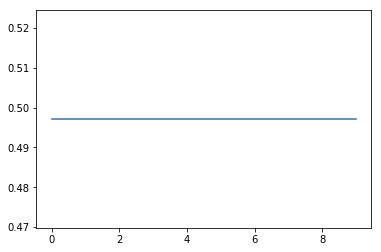

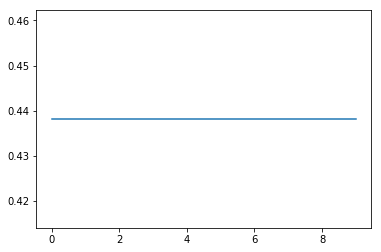

[[  0   0   0  60]
 [  0   0   0  31]
 [  0   0   0  77]
 [  0   0   0 131]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
[1 3 2 3 3 2 2 2 3 1 3 1 1 0 0 0 3 2 1 0 3 3 0 3 3 2 0 2 3 3 3 3 2 3 3 3 3
 0 3 0 3 0 3 0 2 3 2 2 2 3 3 2 2 0 0 2 2 3 1 0 3 3 3 2 0 0 3 3 2 3 1 2 3 0
 2 1 3 3 3 1 1 0 3 3 2 3 2 3 3 3 0 3 3 3 0 2 2 2 0 2 2 2 3 3 2 3 2 3 0 3 3
 1 0 3 0 3 3 2 3 2 1 0 2 2 3 0 3 2 0 2 3 2 2 2 3 2 3 2 2 1 0 3 3 0 3 3 0 3
 0 3 3 2 1 0 3 

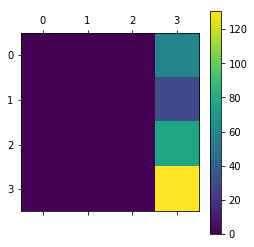

In [60]:
import matplotlib.pyplot as plt

epochs = 10
trainAccuracy = np.zeros(epochs)
testAccuracy = np.zeros(epochs)
lossValue = 0.0

for epoch in range(epochs):
  
    accTrain = tfe.metrics.SparseAccuracy()
    for xb, yb in train_it.batch(16):
        ypred = cnn(xb)
        accTrain(predictions=ypred, labels=yb)
        lossValue = tf.losses.sparse_softmax_cross_entropy(yb, ypred)

    accTest = tfe.metrics.SparseAccuracy()
    for xb, yb in test_it.batch(16):
        #print("test")
        #print(xb, yb)
        ypred = cnn(xb)
        accTest(predictions=ypred, labels=yb)
    
    trainAccuracy[epoch] = accTrain.result().numpy()
    testAccuracy[epoch] = accTest.result().numpy()
    print('==================================')
    print('Train accuracy at epoch {} is {} %'.format(epoch, trainAccuracy[epoch] * 100))
    print('Test accuracy at epoch {} is {} %'.format(epoch, testAccuracy[epoch] * 100))
    print('Loss value at epoch {} is {}'.format(epoch, lossValue))
  
    for xb, yb in train_it.shuffle(1000).batch(16):
        opt.minimize(lambda: loss(cnn, xb, yb))

plt.plot(trainAccuracy)
plt.show()
plt.plot(testAccuracy)
plt.show()

pred = []
true = []

for xb, yb in test_it.batch(16):
    ypred = cnn(xb)
    to_append = [tf.argmax(x) for x in ypred]
    pred = pred + to_append
    true_append = [x for x in yb]
    true = true + true_append

cf = tf.confusion_matrix(labels=true, predictions=pred)
cf = np.array(cf)

print(cf)

plt.matshow(cf)
plt.colorbar()

print(np.array(pred))
print(np.array(true))